Most real-life datasets we encounter during our data science project development have columns of mixed data type. These datasets consist of both categorical as well as numerical columns. However, various Machine Learning models do not work with categorical data and to fit this data into the machine learning model it needs to be converted into numerical data. For example, suppose a dataset has a `Gender` column with categorical elements like `Male and  Female`. These labels have no specific order of preference and also since the data is string labels, machine learning models misinterpreted that there is some sort of hierarchy in them.



One approach to solve this problem can be label encoding where we will assign a numerical value to these labels for example `Male` and `Female` mapped to `0` and `1`. But this can add bias in our model as it will start giving higher preference to the `Female` parameter as 1>0 but ideally, both labels are equally important in the dataset. To deal with this issue we will use the One Hot Encoding technique.



**One Hot Encoding**

One hot encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model.



**The advantages of using one hot encoding include**

1. It allows the use of categorical variables in models that require numerical input.
2. It can improve model performance by providing more information to the model about the categorical variable.
3. It can help to avoid the problem of ordinality, which can occur when a categorical variable has a natural ordering (e.g. “small”, “medium”, “large”).

**The disadvantages of using one hot encoding include**:
1. It can lead to increased dimensionality, as a separate column is created for each category in the variable. This can make the model more complex and slow to train.
2. It can lead to sparse data, as most observations will have a value of 0 in most of the one-hot encoded columns.
3. It can lead to overfitting, especially if there are many categories in the variable and the sample size is relatively small.
4. One-hot-encoding is a powerfultechnique to treat categorical data, but it can lead to increased dimensionality, sparsity, and overfitting. It is important to use it cautiously and consider other methods such as ordinal encoding or binary encoding.


**One Hot Encoding Examples**

In **One Hot Encoding**, the categorical parameters will prepare separate columns for both Male and Female labels. So, wherever there is a Male, the value will be 1 in the Male column and 0 in the Female column, and vice-versa. Let’s understand with an example: Consider the data where fruits, their corresponding categorical values, and prices are given.



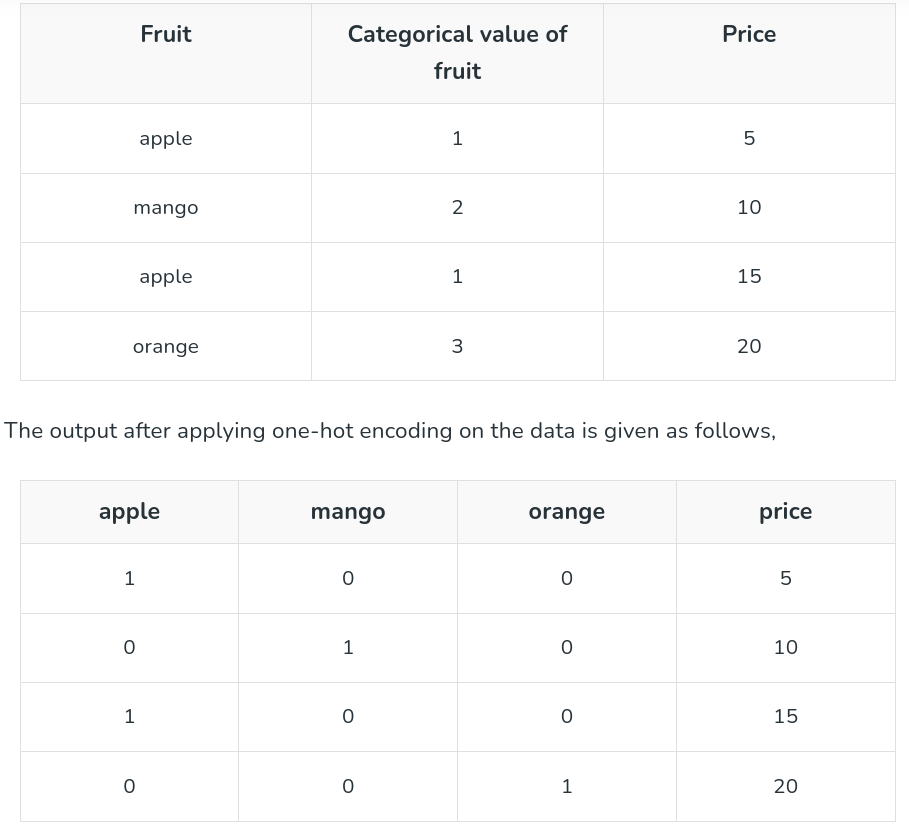

**One-Hot Encoding Using Python**

**Creating Dataframe**
Creating a dataframe to implement one hot encoding from CSV file.




In [ ]:
# Program for demonstration of one hot encoding

# import libraries
import numpy as np
import pandas as pd

data = {'Employee id': [45, 78, 56, 12, 7, 68, 23, 45, 89, 75, 47, 62],
        'Gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male'],
        'Remarks': ['Nice', 'Good', 'Great', 'Great', 'Nice', 'Great', 'Good', 'Nice', 'Great', 'Nice', 'Good', 'Nice'],
        }

# Create DataFrame
data2 = pd.DataFrame(data)
print(data2.head())

   Employee id  Gender Remarks
0           45    Male    Nice
1           78  Female    Good
2           56  Female   Great
3           12    Male   Great
4            7  Female    Nice


**Unique Elements in Categorical Column**

we can use the `unique()` function from the pandas library to get unique elements from the column of the dataframe.




In [ ]:
print(data2['Gender'].unique())
print(data2['Remarks'].unique())

['Male' 'Female']
['Nice' 'Good' 'Great']


**Count of Elements in the Column**

We can use [value_counts](https://www.geeksforgeeks.org/python-pandas-series-value_counts/) function from pandas to get the counts of each element in the dataframe.

In [ ]:
print(data2['Gender'].value_counts())
data2['Remarks'].value_counts()

Gender
Female    7
Male      5
Name: count, dtype: int64


Remarks
Nice     5
Great    4
Good     3
Name: count, dtype: int64

We have two methods available to us for performing one-hot encoding on the categorical column

**One-Hot Encoding of Categorical**

Column Using Pandas library
We can use  [pd.get_dummies()](https://www.geeksforgeeks.org/python-pandas-get_dummies-method/) function from pandas to one-hot encode the categorical columns. This Function




In [ ]:
one_hot_encoded_data = pd.get_dummies(data2, columns = ['Remarks', 'Gender'])
print(one_hot_encoded_data)

    Employee id  Remarks_Good  Remarks_Great  Remarks_Nice  Gender_Female  \
0            45         False          False          True          False   
1            78          True          False         False           True   
2            56         False           True         False           True   
3            12         False           True         False          False   
4             7         False          False          True           True   
5            68         False           True         False           True   
6            23          True          False         False          False   
7            45         False          False          True           True   
8            89         False           True         False          False   
9            75         False          False          True           True   
10           47          True          False         False           True   
11           62         False          False          True          False   

In [ ]:
one_hot_encoded_data

,Employee id,Remarks_Good,Remarks_Great,Remarks_Nice,Gender_Female,Gender_Male
0,45,False,False,True,False,True
1,78,True,False,False,True,False
2,56,False,True,False,True,False
3,12,False,True,False,False,True
4,7,False,False,True,True,False
5,68,False,True,False,True,False
6,23,True,False,False,False,True
7,45,False,False,True,True,False
8,89,False,True,False,False,True
9,75,False,False,True,True,False


We can observe that we have `3 Remarks and 2 Gender` columns in the data. However, you can just use `n-1` columns to define parameters if it has n unique labels. For example, if we only keep the `Gender_Female` column and drop the `Gender_Male` column, then also we can convey the entire information as when the label is 1, it means female and when the label is 0 it means male. This way we can encode the categorical data and reduce the number of parameters as well.



**One Hot Encoding using Sci-kit Learn Library**


`Scikit-learn(sklearn)` is a popular machine-learning library in Python that provide numerous tools for data preprocessing. It provides a **`OneHotEncoder`** function that we use for encoding categorical and numerical variables into binary vectors.

In [ ]:
#one hot encoding using OneHotEncoder of Scikit-Learn

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

#Building a dummy employee dataset for example
data = {'Employee id': [10, 20, 15, 25, 30],
        'Gender': ['M', 'F', 'F', 'M', 'F'],
        'Remarks': ['Good', 'Nice', 'Good', 'Great', 'Nice'],
        }
#Converting into a Pandas dataframe
df = pd.DataFrame(data)
#Print the dataframe:
print(f"Employee data : \n{df}")

#Extract categorical columns from the dataframe
#Here we extract the columns with object datatype as they are the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False) # dense array

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

# Display the resulting dataframe
print(f"Encoded Employee data : \n{df_encoded}")

Employee data : 
   Employee id Gender Remarks
0           10      M    Good
1           20      F    Nice
2           15      F    Good
3           25      M   Great
4           30      F    Nice
Encoded Employee data : 
   Employee id  Gender_F  Gender_M  Remarks_Good  Remarks_Great  Remarks_Nice
0           10       0.0       1.0           1.0            0.0           0.0
1           20       1.0       0.0           0.0            0.0           1.0
2           15       1.0       0.0           1.0            0.0           0.0
3           25       0.0       1.0           0.0            1.0           0.0
4           30       1.0       0.0           0.0            0.0           1.0


In [ ]:
df_encoded

,Employee id,Gender_F,Gender_M,Remarks_Good,Remarks_Great,Remarks_Nice
0,10,0.0,1.0,1.0,0.0,0.0
1,20,1.0,0.0,0.0,0.0,1.0
2,15,1.0,0.0,1.0,0.0,0.0
3,25,0.0,1.0,0.0,1.0,0.0
4,30,1.0,0.0,0.0,0.0,1.0


In [ ]:
one_hot_encoded

array([[0., 1., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.]])

In [ ]:
categorical_columns

['Gender', 'Remarks']

In [ ]:
encoder.get_feature_names_out(categorical_columns)

array(['Gender_F', 'Gender_M', 'Remarks_Good', 'Remarks_Great',
       'Remarks_Nice'], dtype=object)

In [ ]:
one_hot_df

,Gender_F,Gender_M,Remarks_Good,Remarks_Great,Remarks_Nice
0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0


In [ ]:
df

,Employee id,Gender,Remarks
0,10,M,Good
1,20,F,Nice
2,15,F,Good
3,25,M,Great
4,30,F,Nice
